# Inference

Define a specific triangle with these three ordered angles:
{X: A = 85° >= B = 50° >= C = 45°, where A + B + C = 180°}

In [1]:
a = 85
b = 50
c = 45

In [2]:
# for I triangle
mu_i = 1 - (1/60) * min(a-b, b-c)
print(mu_i)

0.9166666666666666


In [3]:
# for R triangle
mu_r = 1 - (1/90) * abs(a-90)
print(mu_r)

0.9444444444444444


In [4]:
# for IR triangle
# IR = I intersection R
mu_ir = 1 - max([
    (1/60) * min(a-b, b-c), (1/90) * abs(a-90)
])
print(mu_ir)

0.9166666666666666


In [5]:
# for E triangle
mu_e = 1 - (1/180) * (a - c)
print(mu_e)

0.7777777777777778


In [6]:
# for T triangle
# T = I intersection R intersection E
mu_t = (1/180) * min([
    3*(a-b), 3*(b-c), 3*abs(a-90), a-c
])
print(mu_t)

0.08333333333333334


# Rank ordering

Suppose 1000 people respond to a questionnaire about their pairwise preferences among five colors, 
X = {red, orange, yellow, green, blue}. 
Define a fuzzy set as A on the universe of colors “best color.”

In [7]:
red_preference = [0, 517, 525, 545, 661]
orange_preference = [483, 0, 841, 477, 576]
yellow_preference = [475, 159, 0, 534, 614]
green_preference = [455, 523, 466, 0, 643]
blue_preference = [339, 424, 386, 357, 0]

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
colors = ['red', 'orange', 'yellow', 'green', 'blue']
preferences = [
    red_preference,
    orange_preference,
    yellow_preference,
    green_preference,
    blue_preference
]

rank_ordering = pd.DataFrame(
    data=preferences,
    index=colors,
    columns=colors
)

In [10]:
rank_ordering['total'] = rank_ordering.sum(axis=1)

print(rank_ordering)

        red  orange  yellow  green  blue  total
red       0     517     525    545   661   2248
orange  483       0     841    477   576   2377
yellow  475     159       0    534   614   1782
green   455     523     466      0   643   2087
blue    339     424     386    357     0   1506


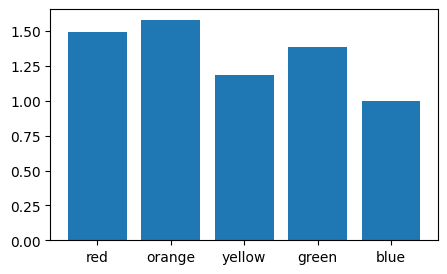

In [11]:
total_norm = rank_ordering['total'] / rank_ordering['total'].min()

plt.figure(figsize=(5, 3))
plt.bar(colors, total_norm)
plt.show()

# Neural networks

For systems where we may have datasets of inputs and corresponding outputs,and where the relationship between the input and output may be highly nonlinear or not known at all, we may want to use fuzzy logic to classify the input and the output data sets broadly into different fuzzy classes. 
Furthermore, for systems that are dynamic in nature (the system parameters may change inanondeterministic fashion) the fuzzy membership functions would have to be repeatedly updated. 
For these types of systems, it is advantageous to use a neural network because the network can modify itself (by changing the weight assignments in the neural network) to accommodate the changes. 
Unlike symbolic learning algorithms, for example, conventional expert systems, neural networks do not learn by adding new rules to their knowledge base; they learn by modifying their overall structure. The lack of intuitive knowledge in the learning process is one of the major drawbacks of neural networks for use in cognitive learning

In [12]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd

In [14]:
# DataPoints
X_train = np.array([
    [0.05, 0.02],
    [0.09, 0.11],
    [0.12, 0.20],
    [0.15, 0.22],
    [0.20, 0.25],
    [0.75, 0.75],
    [0.80, 0.83],
    [0.82, 0.80],
    [0.90, 0.89],
    [0.95, 0.89]
])

# R1, R2
y_train = np.array([
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0]
])

In [15]:
model = Sequential(
    [
        Input(shape=(2,)),
        # 1st layer: 2 inpusts -> 2nd layer
        Dense(3, activation='sigmoid'),
        # 2nd layer -> 3rd layer
        Dense(3, activation='sigmoid'),
        # 3rd layer -> Output
        Dense(2, activation='sigmoid')
    ]
)

In [16]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.summary()

for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()

    print("Layer ", i+1)
    print("Weights ", f"w{i+1}: {weights.shape}")
    print("Biases ", biases.shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

Layer  1
Weights  w1: (2, 3)
Biases  (3,)
Layer  2
Weights  w2: (3, 3)
Biases  (3,)
Layer  3
Weights  w3: (3, 2)
Biases  (2,)


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=1_000,    # iterations number
    batch_size=10,   # all data used at once
    verbose=0        # silence
)  

In [18]:
loss, accuracy = model.evaluate(
    X_train,
    y_train,
    verbose=0
)
print(f"Loss {loss:.4f}")
print(f"Accuracy {accuracy:.4f}")

Loss 0.0846
Accuracy 1.0000


In [19]:
# Data Points 2
X_val = np.array([
    [0.09, 0.04],
    [0.10, 0.10],
    [0.14, 0.21],
    [0.18, 0.24],
    [0.22, 0.28],
    [0.77, 0.78],
    [0.79, 0.81],
    [0.84, 0.82],
    [0.94, 0.93],
    [0.98, 0.99]
])

In [20]:
val_predictions = model.predict(X_val)

for i in range(len(X_val)):
    pred_class = "r1" if val_predictions[i, 0] > val_predictions[i, 1] else "r2"
    print(
        f"Point {i+11}:",
        f"r1={val_predictions[i, 0]:.4f}",
        f"r2={val_predictions[i, 1]:.4f}",
        f"Class: {pred_class}"
    )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Point 11: r1=0.7632 r2=0.3036 Class: r1
Point 12: r1=0.7508 r2=0.3144 Class: r1
Point 13: r1=0.7187 r2=0.3416 Class: r1
Point 14: r1=0.7007 r2=0.3564 Class: r1
Point 15: r1=0.6777 r2=0.3751 Class: r1
Point 16: r1=0.2818 r2=0.6784 Class: r2
Point 17: r1=0.2694 r2=0.6886 Class: r2
Point 18: r1=0.2554 r2=0.7001 Class: r2
Point 19: r1=0.2168 r2=0.7330 Class: r2
Point 20: r1=0.2029 r2=0.7453 Class: r2


# Genetic algorithms

Let us consider the data set

Data number   x     y'
1             1.0   1.0
2             2.0   2.0
3             4.0   4.0
4             6.0   6.0

For performing a line (y = C1x + C2) fit we first encode the parameter set (C1,C2) in the form of bit strings.

In [21]:
pip install scikit-opt

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sko.GA import GA
import matplotlib.pyplot as plt

In [30]:
x_data = np.array([1, 2, 4, 6])
y_data = np.array([1, 2, 4, 6])

In [31]:
def min_error(param):
    c1, c2 = param[0], param[1]
    y_pred = c1 * x_data + c2
    return np.sum((y_data - y_pred) ** 2)

In [32]:
ga = GA(
    func=min_error,
    n_dim=2,
    size_pop=50,
    max_iter=100,
    lb=[-2, -2],
    ub=[5, 5],
    precision=1e-7
)

In [34]:
best_x, best_y = ga.run()

print(
    "Solution: ",
    f"c1: {best_x[0]:.6f}",
    f"c2: {best_x[1]:.6f}",
    f"min_error: {best_y[0]:.6f}"
)

Solution:  c1: 0.978574 c2: 0.102760 min_error: 0.011160


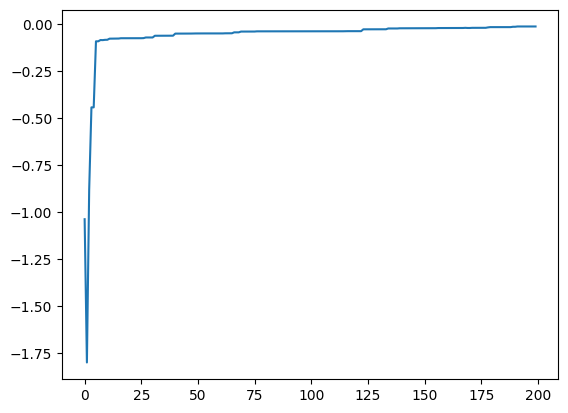

In [37]:
plt.plot(
    -np.array(   # max
        ga.generation_best_Y
    )
)
plt.show()

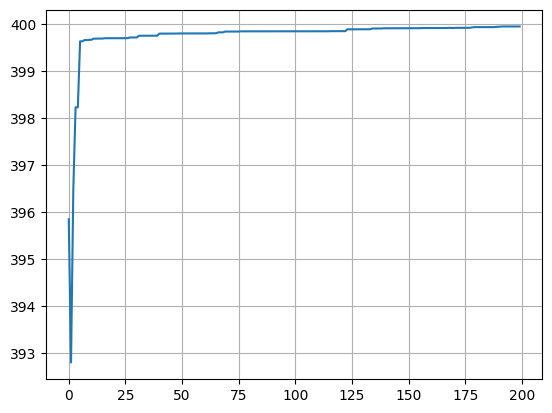

In [38]:
fitness_values = 400 - np.array(ga.generation_best_Y) * 4
plt.plot(fitness_values)
plt.grid(True)
plt.show()

# Inductive reasoning

The shape of an ellipse may be characterized by the ratio of the length of two chords a and b.
Let x = a/b;
then as the ratio a/b -> infinity, the shape of the ellipse tends to a horizontal line, whereas as a/b -> 0, the shape tends to a vertical line. For a/b = 1, the shape is a circle.
Given a set of a/b avlues that have been classified into two classes, divide the variable x = a/b into fuzzy partitions.